# Imports

In [1]:
import pandas                                  as pd
import seaborn                                 as sns
from matplotlib           import pyplot        as plt 
from IPython.core.display import display, HTML

## Jupter settings

In [2]:
# Figure settings
%matplotlib inline
%pylab inline
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams['font.size'] = 24
sns.set()

# Jupter notebook settings
display( HTML( "<style>.container { width:100% !important; }</style>" ))
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

Populating the interactive namespace from numpy and matplotlib


# Read dataset

In [3]:
df_raw = pd.read_csv( 'dataset/big_mart_train.csv' )

In [4]:
df_raw.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---
# Exploratory Data Analysis - EDA
---

In [5]:
df = df_raw

In [6]:
# Check for duplicates
#ids_unique = df['Item_Identifier'].drop_duplicates().shape[0]
ids_unique = len( set( df['Item_Identifier'] ) )
ids_total = df.shape[0]
ids_duplicated = ids_total - ids_unique

print( 'There are {} duplicate IDs for {} total entries'.format( ids_duplicated, ids_total ) )

There are 6964 duplicate IDs for 8523 total entries


## Univariate Analysis

In [22]:
mx = df['Item_Outlet_Sales'].max() 
mn = df['Item_Outlet_Sales'].min() 
print( mx )
print( mn )
print( mx - mn )

13086.9648
33.29
13053.6748


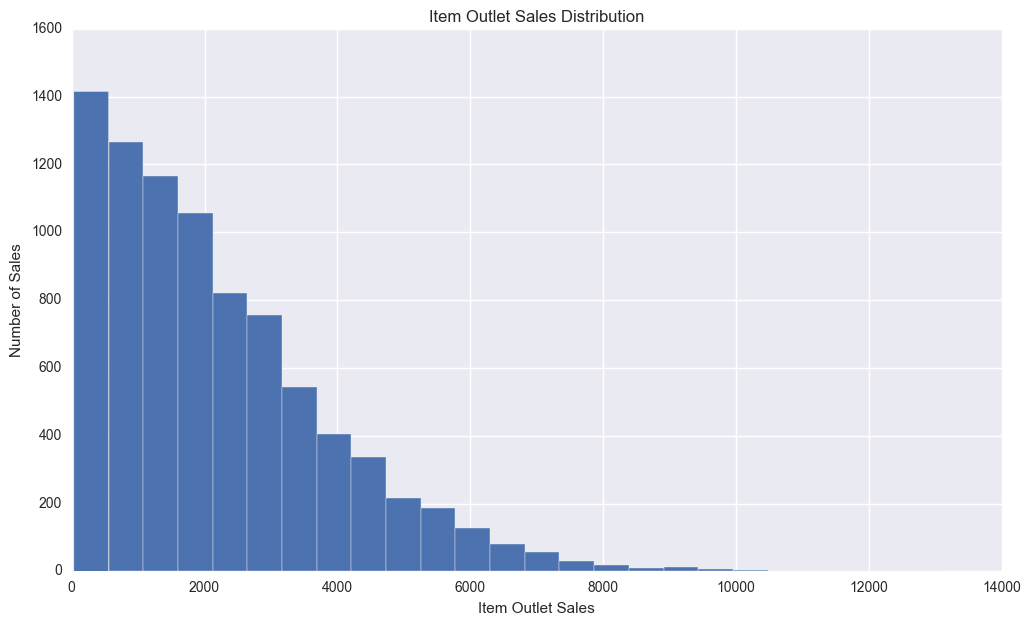

In [71]:
plt.figure( figsize=(12, 7) )
#sns.distplot( df['Item_Outlet_Sales'], kde=False, bins=25 )
df['Item_Outlet_Sales'].hist( bins=25 )
#plt.ticklabel_format( style='plain', axis='x', scilimits=(0,1) )
plt.xlabel( 'Item Outlet Sales')
plt.ylabel( 'Number of Sales' )
plt.title( 'Item Outlet Sales Distribution' )

In [11]:
print( 'Skew is: {}'.format( df['Item_Outlet_Sales'].skew() ) )
print( 'Kurtosis: {}'.format( df['Item_Outlet_Sales'].kurt() ) )

Skew is: 1.1775306028542798
Kurtosis: 1.6158766814287264


## Numerical Predictors

In [74]:
num_features = df.select_dtypes( include=[np.number] )
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

## Correlation between Numerical Predictors and Response Variables

In [81]:
corr = num_features.corr()
corr['Item_Outlet_Sales'].sort_values( ascending=False )

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

## Categorical Predictors

## Distribution of the variable Item_Fat_Content

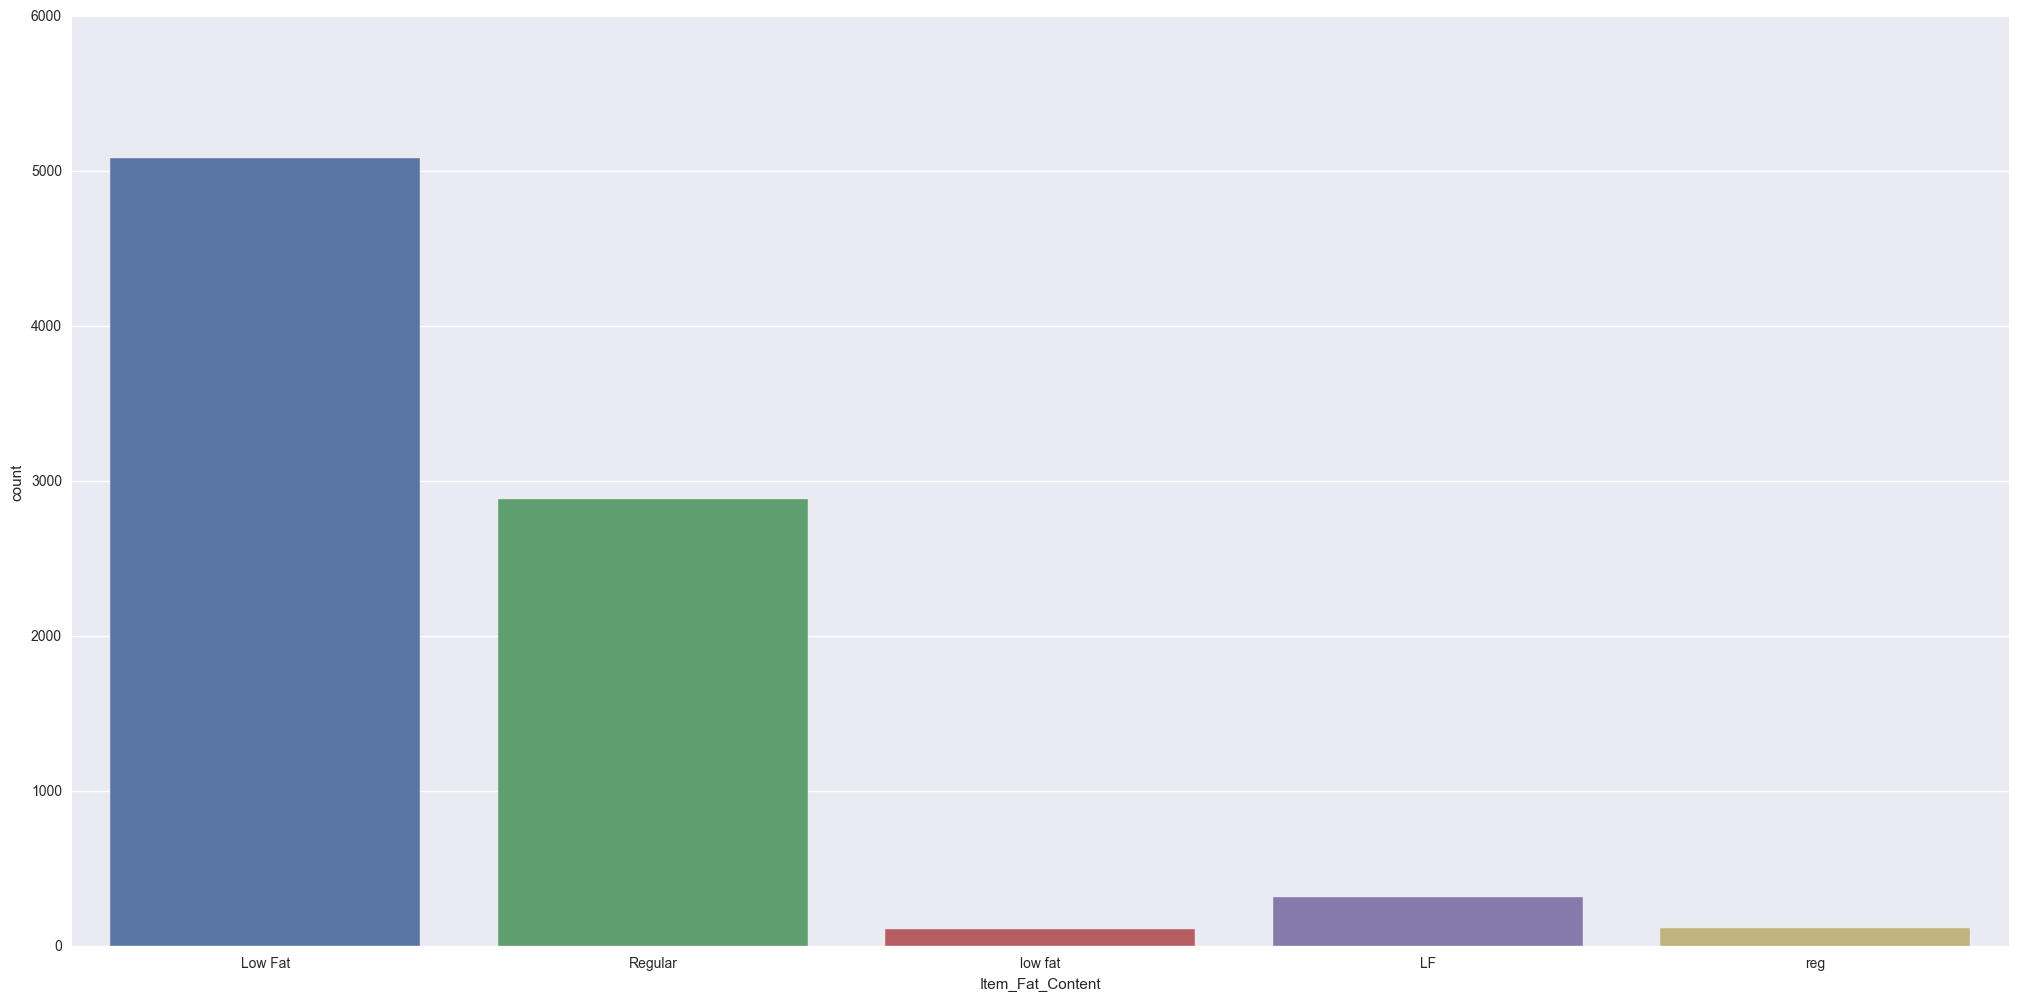

In [82]:
sns.countplot( df['Item_Fat_Content'] )

---
# Data Pre-processing
---

---
# Feature Engineering
---

---
# Feature Transformation
---

---
# Modeling
---

---
# Hyperparameter tunning
---